In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
#change to your own data directory
df = pd.read_csv("../data/expert.csv")
#df = df.iloc[:,1:]
df.head()

,4EBP1pS65,RbpS807,MAPKpT202,MEKpS217,S6,PAI-1,AKTpS473,AMPKpT172,b-Catenin,BIM,...,aHDAC,aMDM2,aJAK,aBRAFm,aPKC,aSTAT3,amTOR,aPI3K,aCDK4,aSRC
0,-0.435,-0.608,-0.855,-0.712,-0.113,-0.089,0.096,0.291,0.428,0.375,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308,-0.322,-0.999,-0.594,0.022,-0.061,0.093,0.222,0.255,0.645,...,-0.89,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.402,-0.549,-0.837,-0.675,-0.011,-0.103,0.089,0.418,0.276,0.439,...,0.00,-0.393,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.475,-0.652,-0.935,-0.751,-0.085,-0.019,0.064,0.207,0.147,0.416,...,0.00,0.000,-0.474,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.611,-1.097,-1.234,-0.928,-0.114,-0.113,-0.002,-0.042,0.277,0.732,...,0.00,0.000,0.000,-0.552,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
"""
repreat the process 1000 times,Ys are the first 87 columns, Xs are the last 12 columns, 
Split training and testing by 70% and 30%
everytime, assign the X_test index to y_hat in order to store the rows used in X_test to
calcualte the average of Y_hat for each row
the final "new_df dataframe contains all rows for X_test(1000*89*30%)"
"""
new_df = pd.DataFrame()
for _ in range(1000):
  Y = df.iloc[:,:-12]
  X = df.iloc[:,-12:]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
  lr = LinearRegression().fit(X_train, Y_train)
  y_hat = lr.predict(X_test)
  y_hat = pd.DataFrame(y_hat)
  #df = df.reindex(np.random.permutation(df.index))
  y_hat.index = X_test.index
  new_df = pd.concat([new_df, y_hat],axis = 0)
print(new_df.shape)

(27000, 87)


In [14]:
# calculate the average by row
df2 = new_df.groupby(new_df.index).mean()
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.326086,-0.592847,-0.777493,-0.555703,-0.048504,-0.115236,0.113087,0.023802,0.407916,0.463969,...,-0.104950,0.003791,0.137213,0.065951,0.190036,0.031690,0.456875,0.004375,0.028314,0.179014
1,-0.446907,-0.501084,-0.995038,-0.488070,-0.189742,0.056880,0.131036,0.041346,0.102296,0.572731,...,-0.123920,0.011103,0.208183,-0.054892,0.051039,-0.029452,0.364431,1.493857,-0.125175,0.305022
2,-0.450576,-0.624489,-0.877222,-0.622873,-0.177523,-0.069941,0.019897,0.017071,0.247354,0.412541,...,-0.065426,0.001701,0.076301,0.042572,0.239423,0.217691,0.384216,0.154535,0.079178,0.267267
3,-0.286005,-0.659613,-0.929808,-0.562253,-0.061781,-0.108198,0.064114,0.126924,0.228684,0.437167,...,-0.071272,-0.018885,0.093614,0.055348,0.184024,0.214973,0.429328,0.060425,0.044490,0.470919
4,-0.369497,-0.861861,-1.344652,-1.104354,-0.110114,-0.223760,0.311732,0.296865,0.416415,0.572017,...,-0.040286,0.009459,0.194570,0.075920,0.288302,-0.152845,0.685651,-0.020294,-0.002381,0.655493


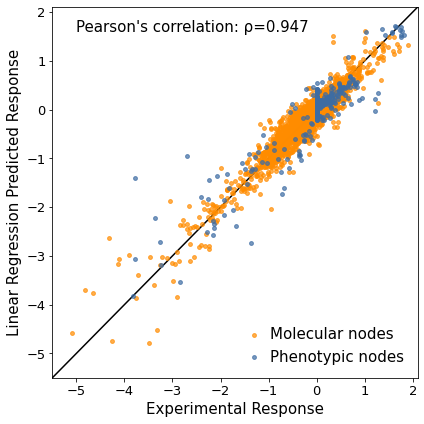

In [21]:
#only keep all Ys columns for ploting
df_y = df.iloc[:,:-12]

x_all = df_y.values.flatten()
y_all = df2.values.flatten()

x_prot = df.iloc[:,0:82]
y_prot = df2.iloc[:,0:82]
x_pheno = df.iloc[:,82:87]
y_pheno = df2.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)
#plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#FC5A5B",zorder=3)
plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)
#plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#FECD7F",zorder=4)
plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1,prop={'size': 15})
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')
#plt.scatter(x_all, y_all, s = 15, alpha = 0.6)
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'black', 'alpha': 1})
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#F18A64', 'alpha': 1})
plt.plot( [-6,3],[-6,3],color='black')


plt.xticks(np.arange(-6,3),size=13)
plt.yticks(np.arange(-6,3),size=13)
#plt.grid(True, which='both')

ll = [-5.5, 2.1]
plt.xlim(ll)
plt.ylim(ll)

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 15)
plt.xlabel('Experimental Response',size=15)
plt.ylabel('Linear Regression Predicted Response',size=15)

plt.rcParams['figure.figsize'] = 6, 6
plt.tight_layout()
plt.savefig('LR_RF.pdf')
